In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Dataset

In [2]:
df = pd.read_csv('data-2.csv')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Counting Revenue

In [4]:
# Membuat fungsi untuk check apakah pokemon memiliki satu atau dua tipe
kolom = []

def kali (a,b):
    result = a * b
    return result

In [5]:
for idx in range(len(df)):
    res = kali(df.loc[idx, 'Quantity'],df.loc[idx, 'UnitPrice'])
    kolom.append(res)

In [6]:
df['Revenue'] = kolom

## Checking Missing Value

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Revenue             0
dtype: int64

In [8]:
df.dropna(inplace = True, axis = 0)

In [9]:
del df['CustomerID']

## Grouping Country

In [10]:
df_group = df.groupby(by = 'Country').sum()

In [11]:
df_group = df_group.sort_values(by = 'Revenue', ascending = False)
df_group.head(10)

,Quantity,UnitPrice,Revenue
Country,,,
United Kingdom,4008533,1178277.264,6767873.394
Netherlands,200128,6492.550,284661.540
EIRE,136329,38253.580,250285.220
Germany,117448,37666.000,221698.210
France,109848,42871.240,196712.840
Australia,83653,4054.750,137077.270
Switzerland,29778,6568.600,55739.400
Spain,26824,12633.450,54774.580
Belgium,23152,7540.130,40910.960


In [12]:
df_group2 = df.groupby(by = 'Description').sum()
df_group2 = df_group2.sort_values(by = 'Revenue', ascending = False)
df_group2.head(5)

,Quantity,UnitPrice,Revenue
Description,,,
REGENCY CAKESTAND 3 TIER,11555,23678.05,132870.40
WHITE HANGING HEART T-LIGHT HOLDER,34147,5985.12,93823.85
JUMBO BAG RED RETROSPOT,45066,3345.70,83236.76
PARTY BUNTING,15027,6897.06,67687.53
POSTAGE,3002,45314.68,66710.24


In [13]:
df3 = df_group2.sort_values(by = 'Quantity', ascending = False)
df3.head(5)

,Quantity,UnitPrice,Revenue
Description,,,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,139.59,13332.33
JUMBO BAG RED RETROSPOT,45066,3345.70,83236.76
ASSORTED COLOUR BIRD ORNAMENT,35314,2383.46,56499.22
WHITE HANGING HEART T-LIGHT HOLDER,34147,5985.12,93823.85
PACK OF 72 RETROSPOT CAKE CASES,33409,591.83,16247.95


([<matplotlib.patches.Wedge at 0x281d95565f0>,
 [Text(-0.920146181485047, 0.6027694457240571, 'United Kingdom'),
  Text(0.5452932394255663, -0.9553299341257826, 'Netherlands'),
  Text(0.7262682809127279, -0.8261563920590769, 'EIRE'),
  Text(0.8615161144486145, -0.683951741386307, 'Germany'),
  Text(0.9585997433757588, -0.5395243571887459, 'France'),
  Text(1.018941852873541, -0.41443636479275725, 'Australia'),
  Text(1.0464488119968076, -0.3390352251174943, 'Switzerland'),
  Text(1.0597110759740522, -0.29497870339723953, 'Spain'),
  Text(1.0696971104121848, -0.2564139075319862, 'Belgium'),
  Text(1.0767580476349066, -0.22492689224160034, 'Sweden'),
  Text(1.0824825155665727, -0.19552903490956258, 'Japan'),
  Text(1.087314356773556, -0.16657577721298097, 'Norway'),
  Text(1.0910419526413973, -0.14009802845310634, 'Portugal'),
  Text(1.0935603124662305, -0.11885218970957381, 'Finland'),
  Text(1.095327305920032, -0.10128224378421313, 'Channel Islands'),
  Text(1.0966983110249542, -0.0851

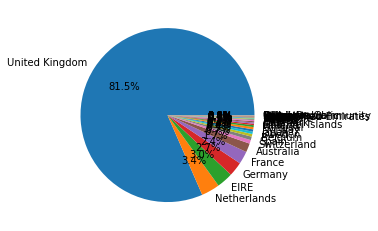

In [14]:
plt.pie(df_group['Revenue'], labels=df_group.index, autopct='%1.1f%%')

In [15]:
# Mencari barang paling laris di UK
df_uk = df[df['Country'] == "United Kingdom"]
df_uk.groupby(df['Description']).sum().sort_values(by = 'Revenue', ascending = False)

,Quantity,UnitPrice,Revenue
Description,,,
REGENCY CAKESTAND 3 TIER,8948,19625.35,103122.85
WHITE HANGING HEART T-LIGHT HOLDER,32097,5727.22,88313.95
JUMBO BAG RED RETROSPOT,40880,3029.62,75416.67
PARTY BUNTING,13728,6469.01,61952.58
ASSORTED COLOUR BIRD ORNAMENT,32679,2258.39,52314.87
...,...,...,...
CHALKBOARD KITCHEN ORGANISER,-6,71.85,-125.70
POSTAGE,-21,18157.01,-753.97
Discount,-1191,4914.07,-5028.98


In [16]:
df_uk.groupby(df['UnitPrice']).sum().sort_values(by = 'Revenue', ascending = False).head(5)

,Quantity,UnitPrice,Revenue
UnitPrice,,,
1.25,407326,52660.00,509157.50
1.65,292016,55029.15,481826.40
2.95,117054,72109.80,345309.30
4.95,67483,82288.80,334040.85
2.55,127514,28458.00,325160.70


In [17]:
df['UnitPrice'].mean()

3.460471018536043

In [18]:
df_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,United Kingdom,214.80


In [19]:
df_uk['InvoiceDate'] = pd.to_datetime(df_uk.loc[:,'InvoiceDate'],format='%m/%d/%Y %H:%M')

C:\Users\alexa\AppData\Local\Temp\ipykernel_12820\323363630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['InvoiceDate'] = pd.to_datetime(df_uk.loc[:,'InvoiceDate'],format='%m/%d/%Y %H:%M')


In [20]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   Country      361878 non-null  object        
 7   Revenue      361878 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


<AxesSubplot:>

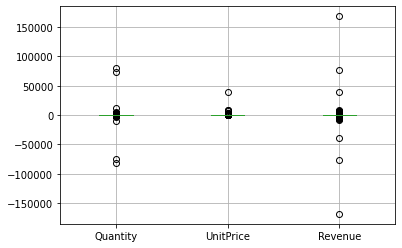

In [36]:
df_uk.boxplot()

In [22]:
november = df_uk[df_uk['InvoiceDate'].month == 11]

AttributeError: 'Series' object has no attribute 'month'